# Financial Econometrics: Homework 2
#### Kryštof Veřtát, Tomáš Svoboda

## Problem 1

In [1]:

library(highfrequency)
library(rugarch)
library(repr)
library(xts)
library(fst)

Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




### 1)

In [2]:
# Load data and tranform it in xts
BAC <- read.fst("HW_3_BAC_1min.fst")
MSFT <- read.fst("HW_3_MSFT_1min.fst")
XOM <- read.fst("HW_3_XOM_1min.fst")

BAC_xts <- xts(BAC$V1, order.by = BAC$index)
MSFT_xts <- xts(MSFT$V1, order.by = MSFT$index)
XOM_xts <- xts(XOM$V1, order.by = XOM$index)

### 2)

In [3]:
# Select only data from selected years and time
# Save the same the data with and without time stamp (some functions do not work if the data contain time stamp)
BAC_xts <- BAC_xts["2012/2016"]
BAC_xts <- BAC_xts["T09:30:00/T16:00:00" ]
BAC_no_time <- BAC_xts
index(BAC_no_time)<-as.Date(index(BAC_no_time))

MSFT_xts <- MSFT_xts["2012/2016"]
MSFT_xts <- MSFT_xts["T09:30:00/T16:00:00" ]
MSFT_no_time <- MSFT_xts
index(MSFT_no_time)<-as.Date(index(MSFT_no_time))

XOM_xts <- XOM_xts["2012/2016"]
XOM_xts <- XOM_xts["T09:30:00/T16:00:00" ]
XOM_no_time <- XOM_xts
index(XOM_no_time)<-as.Date(index(XOM_no_time))


### 3)

In [4]:
# Separate data by days and calculate returns
BAC_daily <- split(BAC_xts, f = "days")
BAC_returns <- lapply(BAC_daily, makeReturns)
BAC_returns<- do.call(rbind, BAC_returns)
BAC_RV_daily <- rCov(BAC_returns, makeReturns = F)
index(BAC_RV_daily)<-as.Date(index(BAC_RV_daily))

MSFT_daily <- split(MSFT_xts, f = "days")
MSFT_returns <- lapply(MSFT_daily, makeReturns)
MSFT_returns<- do.call(rbind, MSFT_returns)
MSFT_RV_daily <- rCov(MSFT_returns, makeReturns = F)
index(MSFT_RV_daily)<-as.Date(index(MSFT_RV_daily))

XOM_daily <- split(XOM_xts, f = "days")
XOM_returns <- lapply(XOM_daily, makeReturns)
XOM_returns<- do.call(rbind, XOM_returns)
XOM_RV_daily <- rCov(XOM_returns, makeReturns = F)
index(XOM_RV_daily)<-as.Date(index(XOM_RV_daily))

### 4)

In [5]:
# Calculate realized variance using rCov function
BAC_RV_returns <- rCov(BAC_returns, makeReturns = FALSE)
BAC_RV_prices <- rCov(BAC_xts, makeReturns = TRUE)
index(BAC_RV_returns)<-as.Date(index(BAC_RV_returns))

MSFT_RV_returns <- rCov(MSFT_returns, makeReturns = FALSE)
MSFT_RV_prices <- rCov(MSFT_xts, makeReturns = TRUE)
index(MSFT_RV_returns)<-as.Date(index(MSFT_RV_returns))

XOM_RV_returns <- rCov(XOM_returns, makeReturns = FALSE)
XOM_RV_prices <- rCov(XOM_xts, makeReturns = TRUE)
index(XOM_RV_returns)<-as.Date(index(XOM_RV_returns))

In [6]:
head(BAC_RV_returns)
head(BAC_RV_returns)  

head(MSFT_RV_returns)
head(MSFT_RV_returns)

head(XOM_RV_returns)
head(XOM_RV_returns)

                   [,1]
2012-01-03 0.0007787649
2012-01-04 0.0010187267
2012-01-05 0.0015620921
2012-01-06 0.0011918156
2012-01-09 0.0008431192
2012-01-10 0.0007357003

                   [,1]
2012-01-03 0.0007787649
2012-01-04 0.0010187267
2012-01-05 0.0015620921
2012-01-06 0.0011918156
2012-01-09 0.0008431192
2012-01-10 0.0007357003

                   [,1]
2012-01-03 9.927639e-05
2012-01-04 1.114057e-04
2012-01-05 1.098341e-04
2012-01-06 9.830867e-05
2012-01-09 1.218598e-04
2012-01-10 1.366224e-04

                   [,1]
2012-01-03 9.927639e-05
2012-01-04 1.114057e-04
2012-01-05 1.098341e-04
2012-01-06 9.830867e-05
2012-01-09 1.218598e-04
2012-01-10 1.366224e-04

                   [,1]
2012-01-03 6.315347e-05
2012-01-04 6.659626e-05
2012-01-05 8.473441e-05
2012-01-06 4.987180e-05
2012-01-09 3.610025e-05
2012-01-10 3.850767e-05

                   [,1]
2012-01-03 6.315347e-05
2012-01-04 6.659626e-05
2012-01-05 8.473441e-05
2012-01-06 4.987180e-05
2012-01-09 3.610025e-05
2012-01-10 3.850767e-05

Realized Variance calculated from 1 minute prices and returns is the same.

### 5)

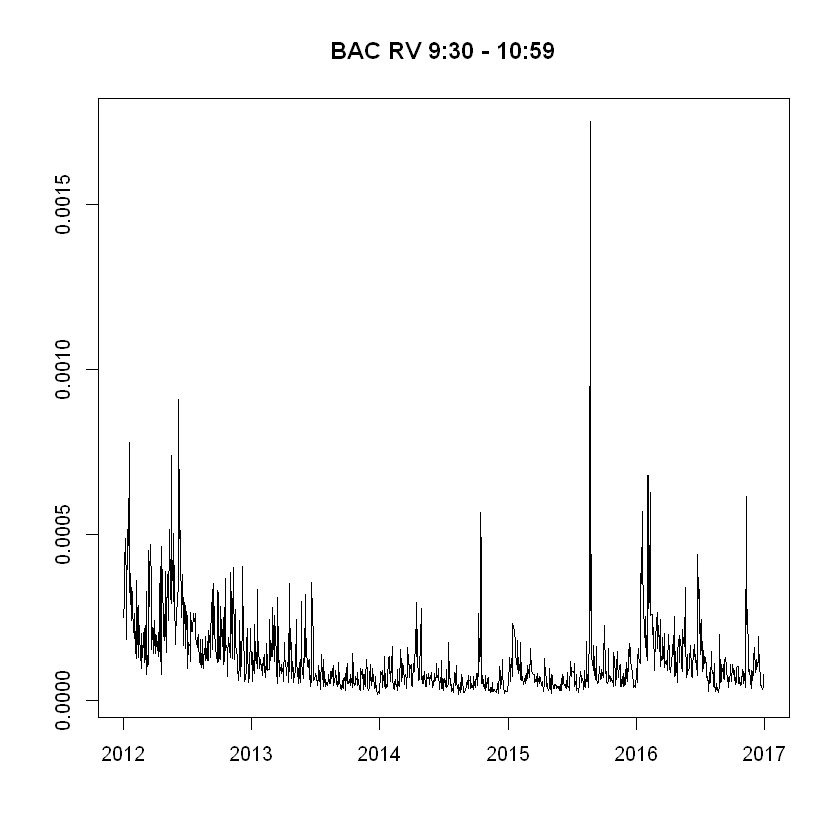

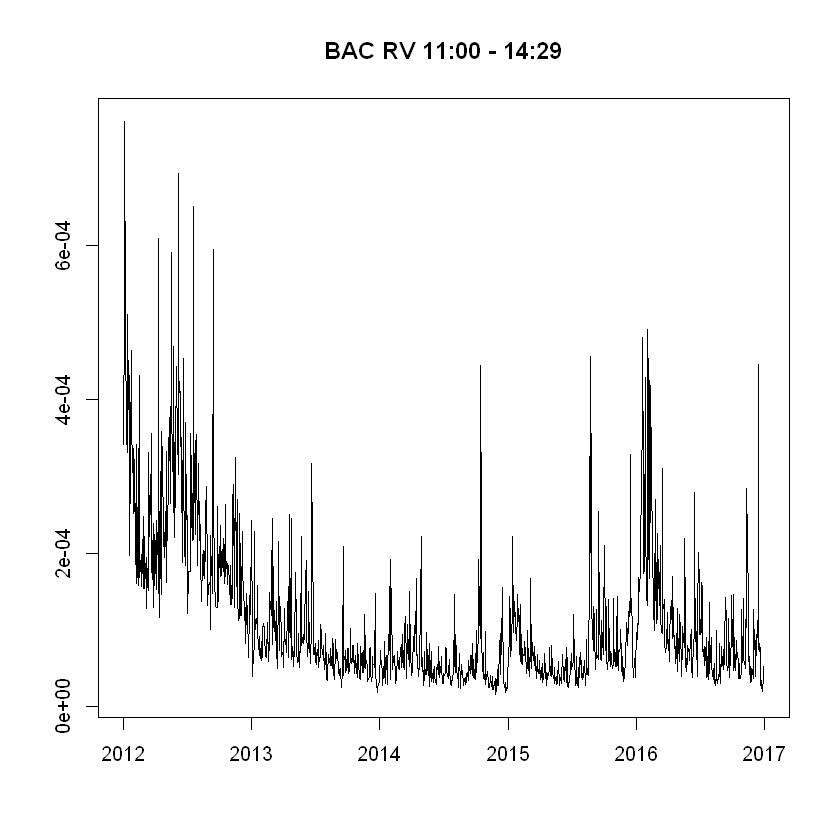

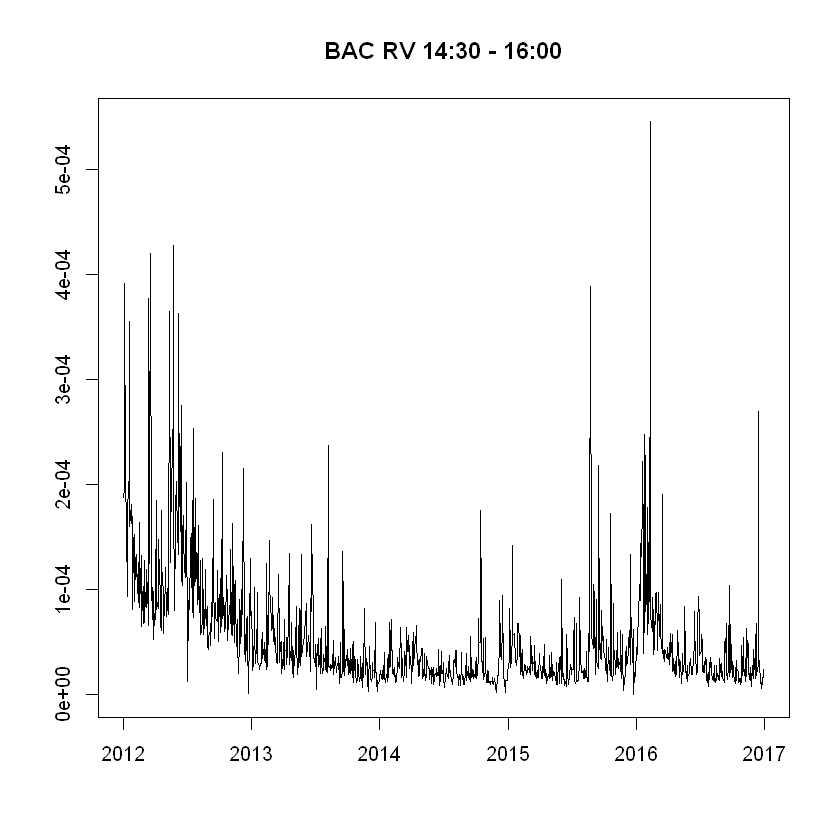

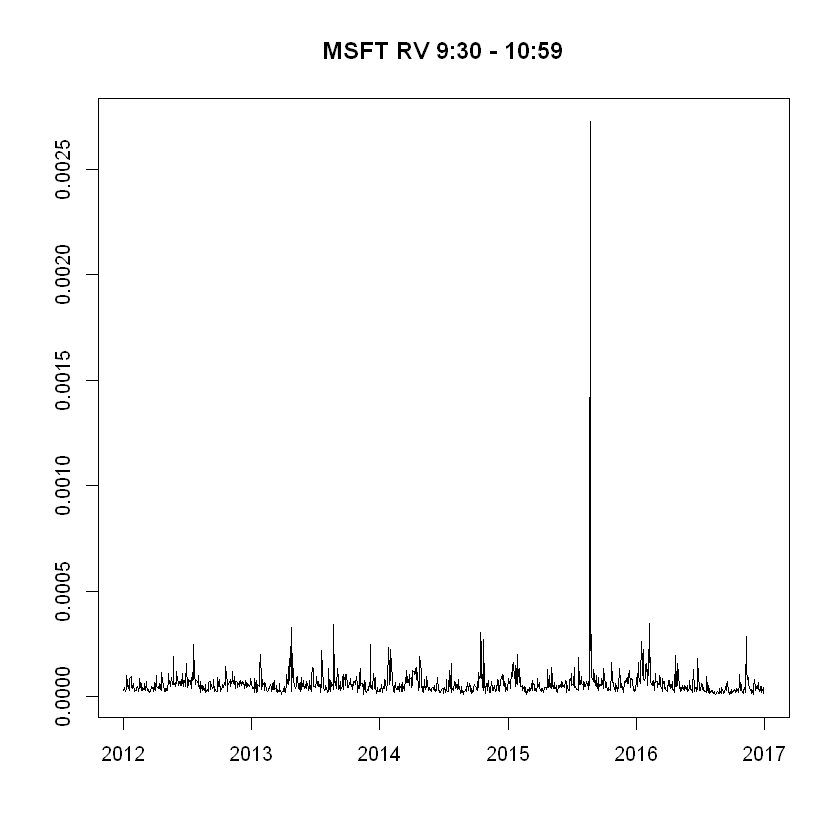

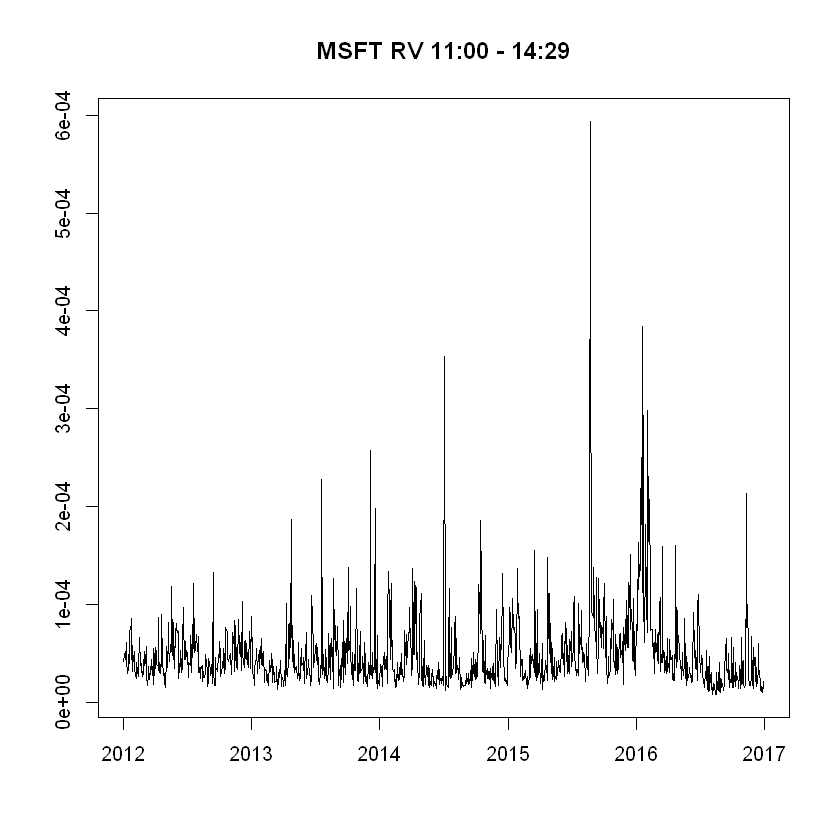

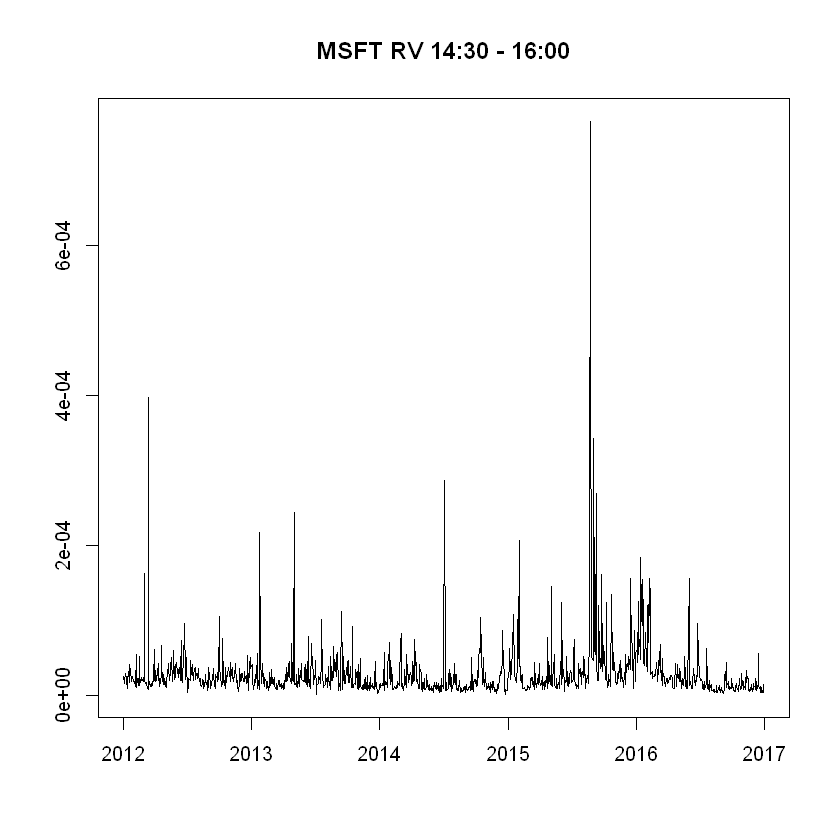

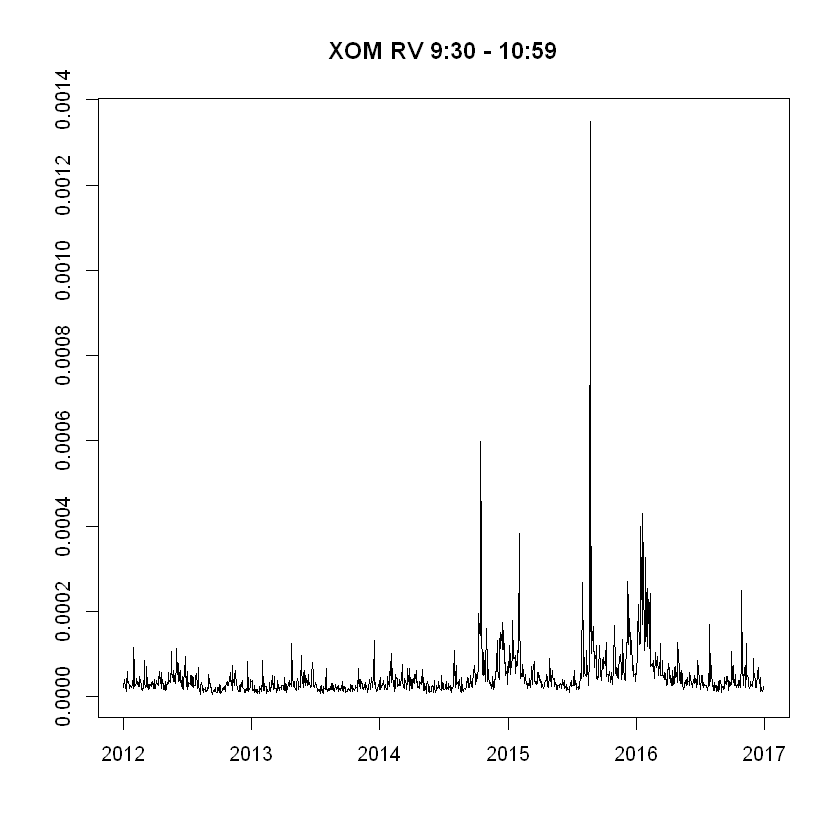

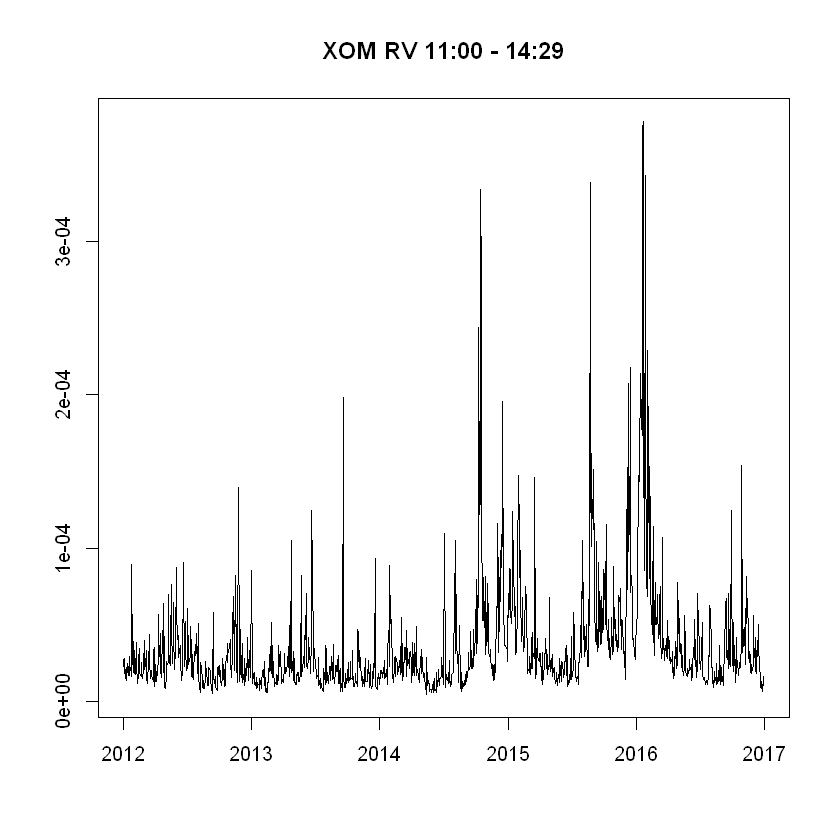

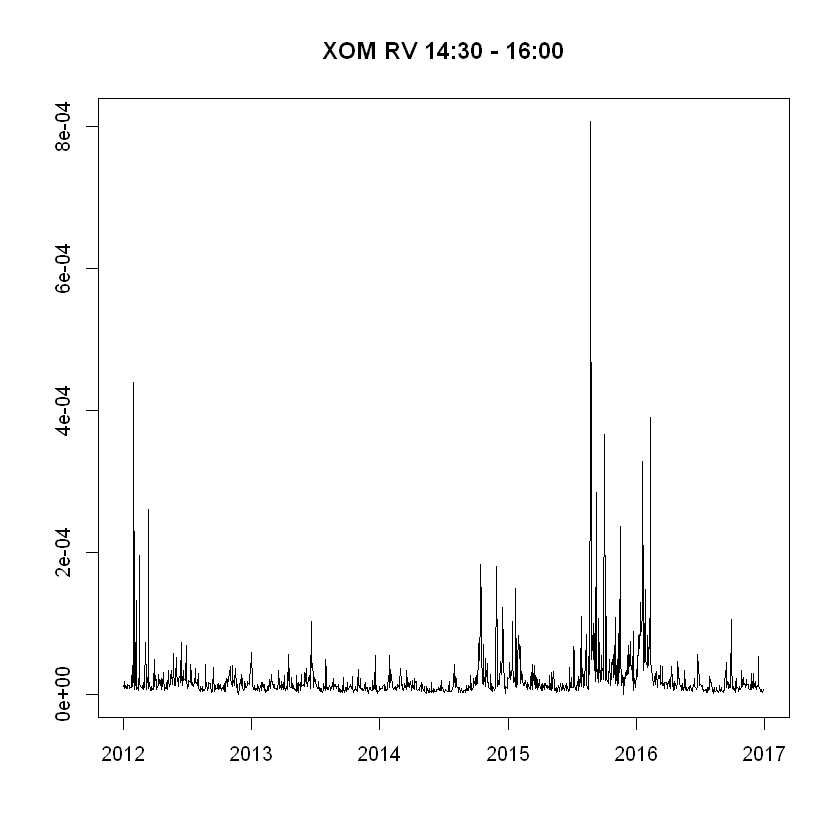

In [7]:
# Calculate realized variance from returns for intraday periods
# First calculate returns, subset it by time, then calculate RV and plot it

# BAC
BAC_returns1 <- BAC_returns["T09:30:00/T10:59:00" ]
index(BAC_returns1)<-as.Date(index(BAC_returns1))
BAC_RV_returns1 <- rCov(BAC_returns1, makeReturns = F)
plot.zoo(BAC_RV_returns1, xlab = NA,ylab = NA, main = "BAC RV 9:30 - 10:59")

BAC_returns2 <- BAC_returns["T11:00:00/T14:29:00" ]
index(BAC_returns2)<-as.Date(index(BAC_returns2))
BAC_RV_returns2 <- rCov(BAC_returns2, makeReturns = F)
plot.zoo(BAC_RV_returns2, xlab = NA,ylab = NA, main = "BAC RV 11:00 - 14:29")

BAC_returns3 <- BAC_returns["T14:30:00/T16:00:00" ]
index(BAC_returns3)<-as.Date(index(BAC_returns3))
BAC_RV_returns3 <- rCov(BAC_returns3, makeReturns = F)
plot.zoo(BAC_RV_returns3, xlab = NA,ylab = NA, main = "BAC RV 14:30 - 16:00")

# MSFT
MSFT_returns1 <- MSFT_returns["T09:30:00/T10:59:00" ]
index(MSFT_returns1)<-as.Date(index(MSFT_returns1))
MSFT_RV_returns1 <- rCov(MSFT_returns1, makeReturns = F)
plot.zoo(MSFT_RV_returns1, xlab = NA,ylab = NA, main = "MSFT RV 9:30 - 10:59")

MSFT_returns2 <- MSFT_returns["T11:00:00/T14:29:00" ]
index(MSFT_returns2)<-as.Date(index(MSFT_returns2))
MSFT_RV_returns2 <- rCov(MSFT_returns2, makeReturns = F)
plot.zoo(MSFT_RV_returns2, xlab = NA,ylab = NA, main = "MSFT RV 11:00 - 14:29")

MSFT_returns3 <- MSFT_returns["T14:30:00/T16:00:00" ]
index(MSFT_returns3)<-as.Date(index(MSFT_returns3))
MSFT_RV_returns3 <- rCov(MSFT_returns3, makeReturns = F)
plot.zoo(MSFT_RV_returns3, xlab = NA,ylab = NA, main = "MSFT RV 14:30 - 16:00")

# XOM
XOM_returns1 <- XOM_returns["T09:30:00/T10:59:00" ]
index(XOM_returns1)<-as.Date(index(XOM_returns1))
XOM_RV_returns1 <- rCov(XOM_returns1, makeReturns = F)
plot.zoo(XOM_RV_returns1, xlab = NA,ylab = NA, main = "XOM RV 9:30 - 10:59")

XOM_returns2 <- XOM_returns["T11:00:00/T14:29:00" ]
index(XOM_returns2)<-as.Date(index(XOM_returns2))
XOM_RV_returns2 <- rCov(XOM_returns2, makeReturns = F)
plot.zoo(XOM_RV_returns2, xlab = NA,ylab = NA, main = "XOM RV 11:00 - 14:29")

XOM_returns3 <- XOM_returns["T14:30:00/T16:00:00" ]
index(XOM_returns3)<-as.Date(index(XOM_returns3))
XOM_RV_returns3 <- rCov(XOM_returns3, makeReturns = F)
plot.zoo(XOM_RV_returns3, xlab = NA,ylab = NA, main = "XOM RV 14:30 - 16:00")


### 6)

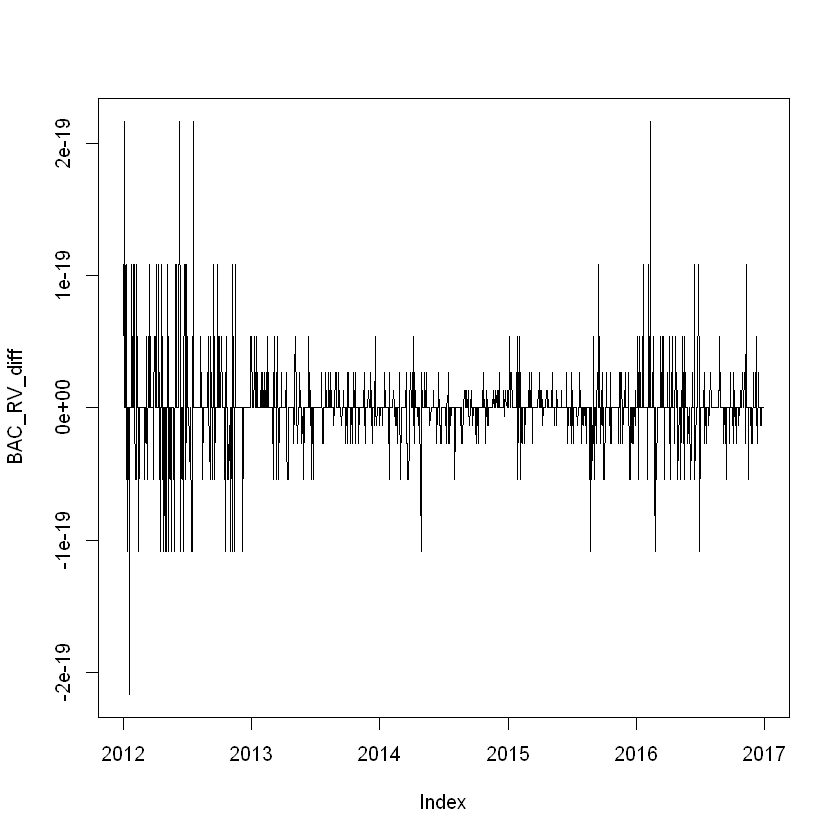

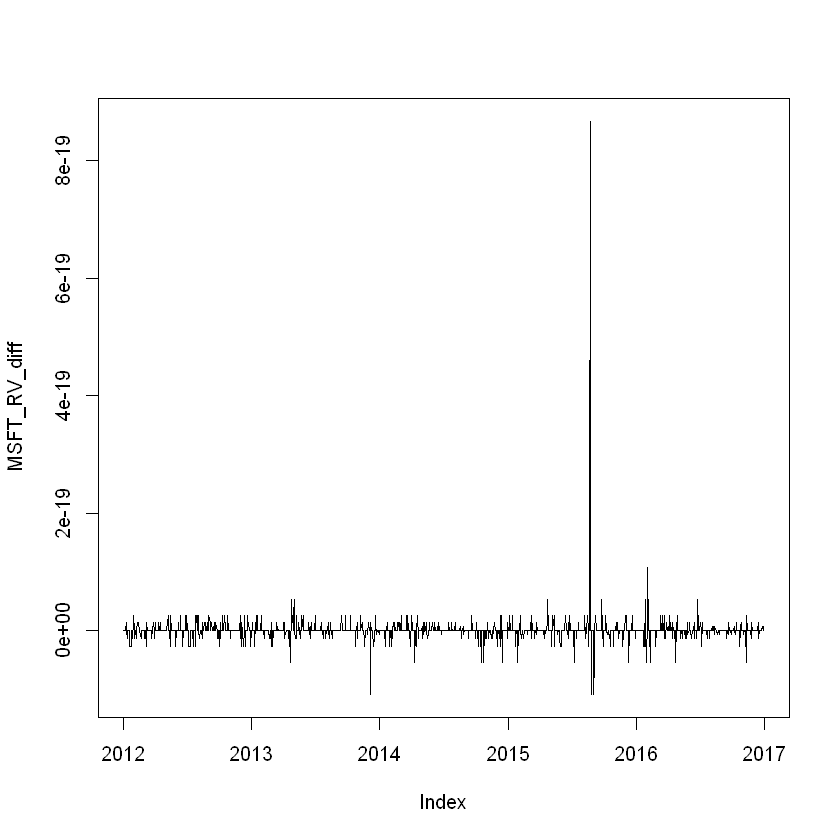

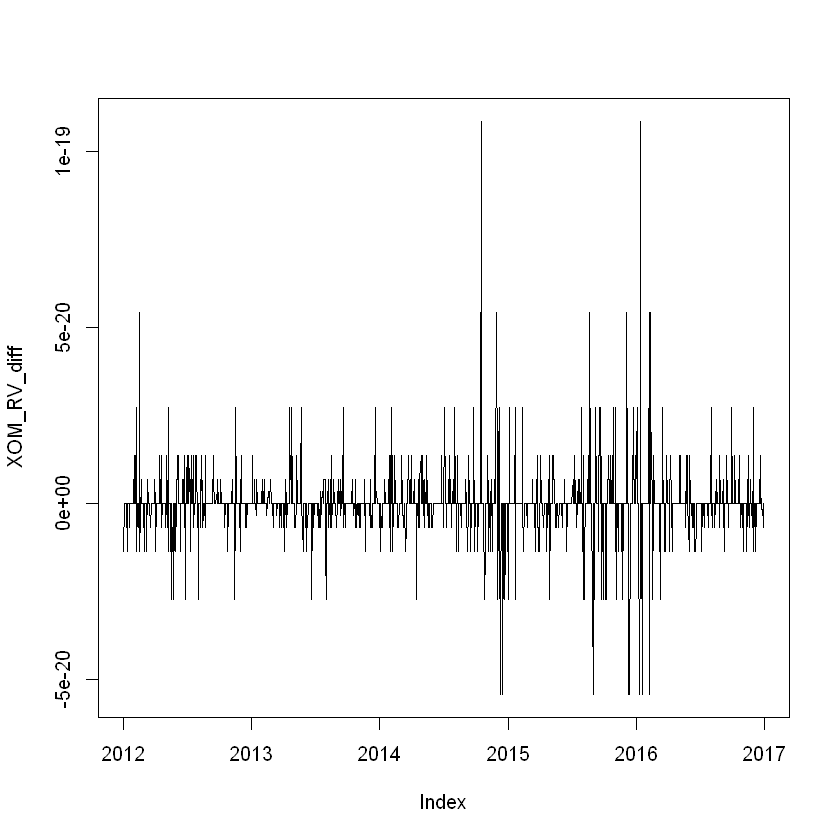

In [8]:
# Calculate daily RV from returns and intraday RV as the sum of RV from intraday periods from the previous part. Plot the difference between the two.

# BAC3
BAC_RV_intraday <- BAC_RV_returns1 + BAC_RV_returns2 + BAC_RV_returns3
BAC_RV_diff <-   BAC_RV_daily - BAC_RV_intraday
plot.zoo(BAC_RV_diff)

# MSFT
MSFT_RV_intraday <- MSFT_RV_returns1 + MSFT_RV_returns2 + MSFT_RV_returns3
MSFT_RV_diff <-   MSFT_RV_daily - MSFT_RV_intraday
plot.zoo(MSFT_RV_diff)

# XOM
XOM_RV_intraday <- XOM_RV_returns1 + XOM_RV_returns2 + XOM_RV_returns3
XOM_RV_diff <-   XOM_RV_daily - XOM_RV_intraday
plot.zoo(XOM_RV_diff)

As we can see, the difference is greater in times of high realized variance for all stocks. 
Higher realized variance means also higher volatility, which can be linked for example to wider bid-ask spread and jumps.

### 7)

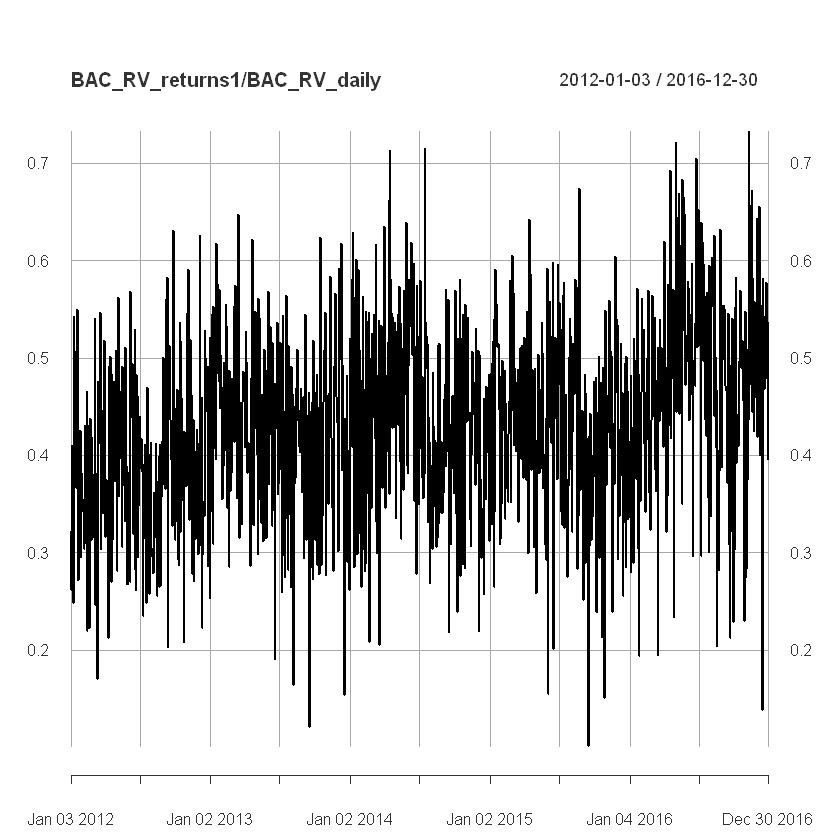

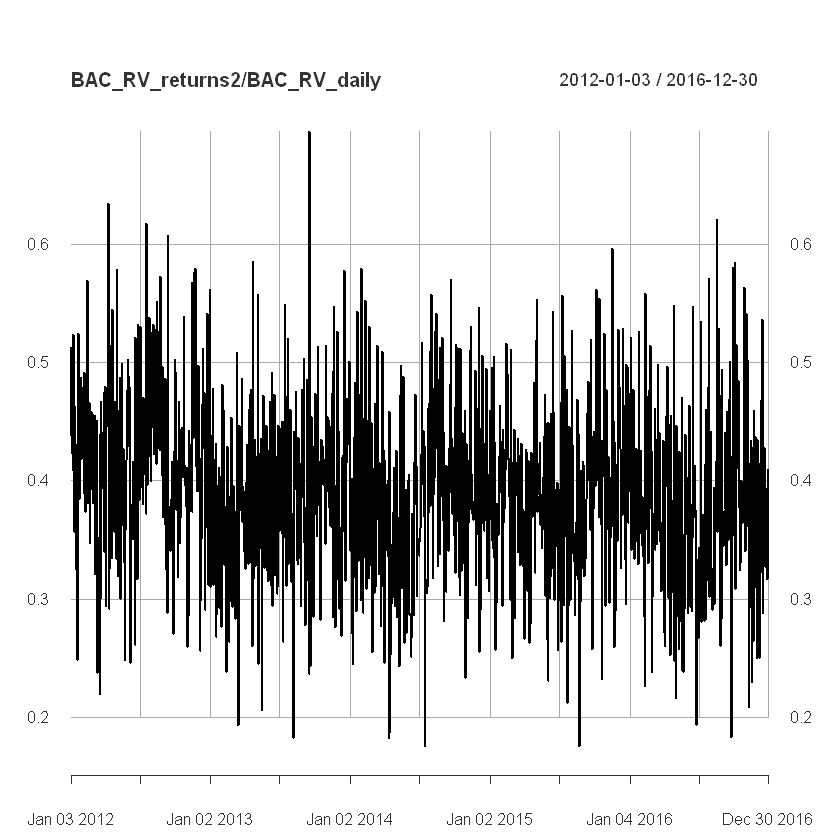

[1] 0.4238498

[1] 0.39157

[1] 0.1845802

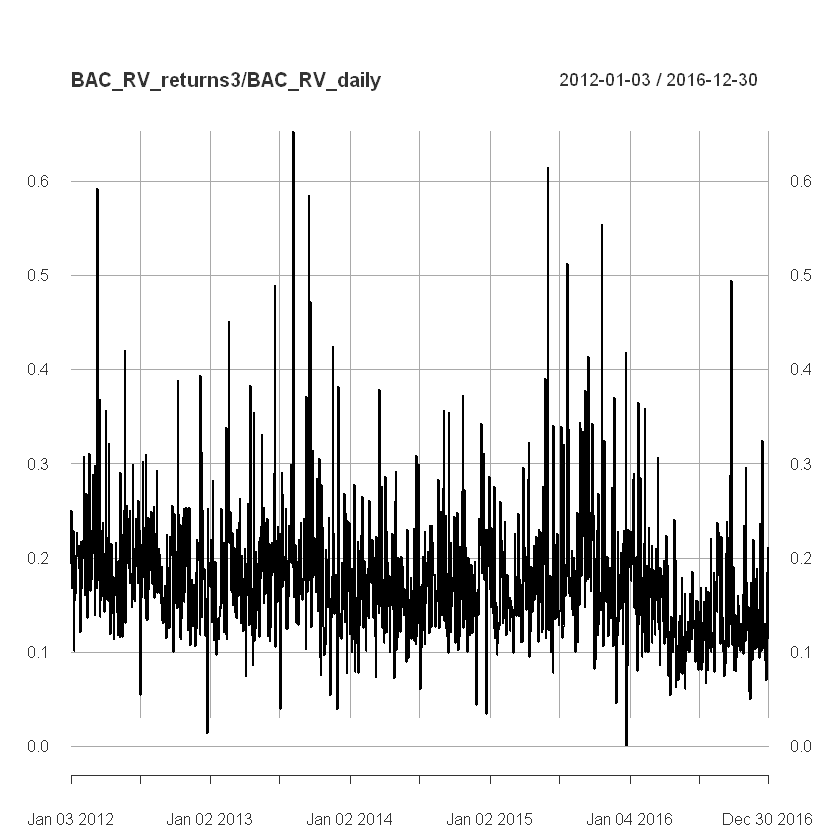

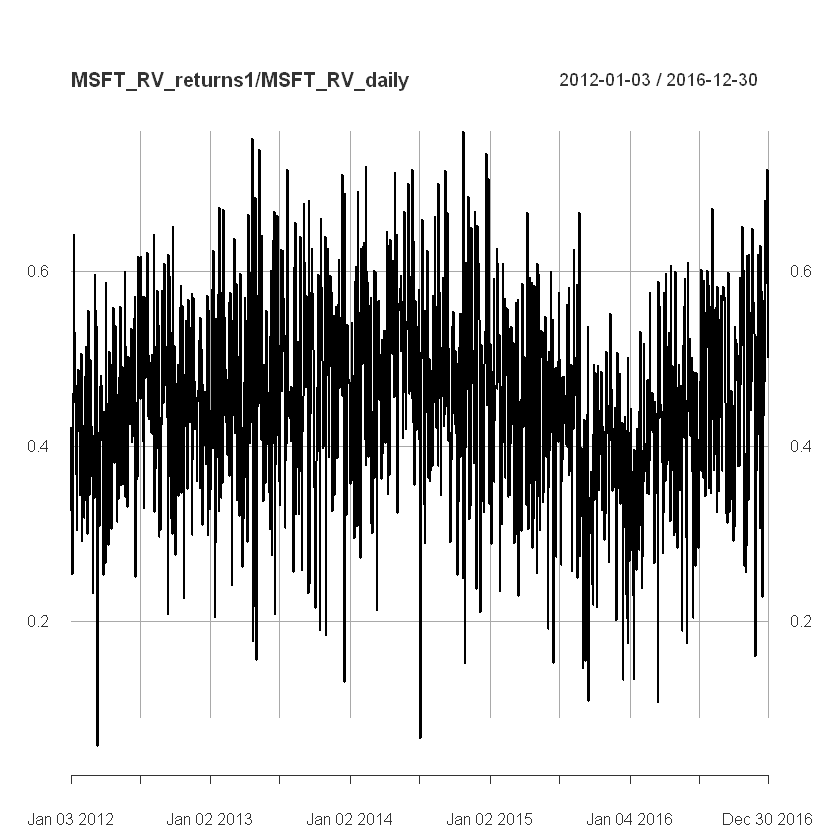

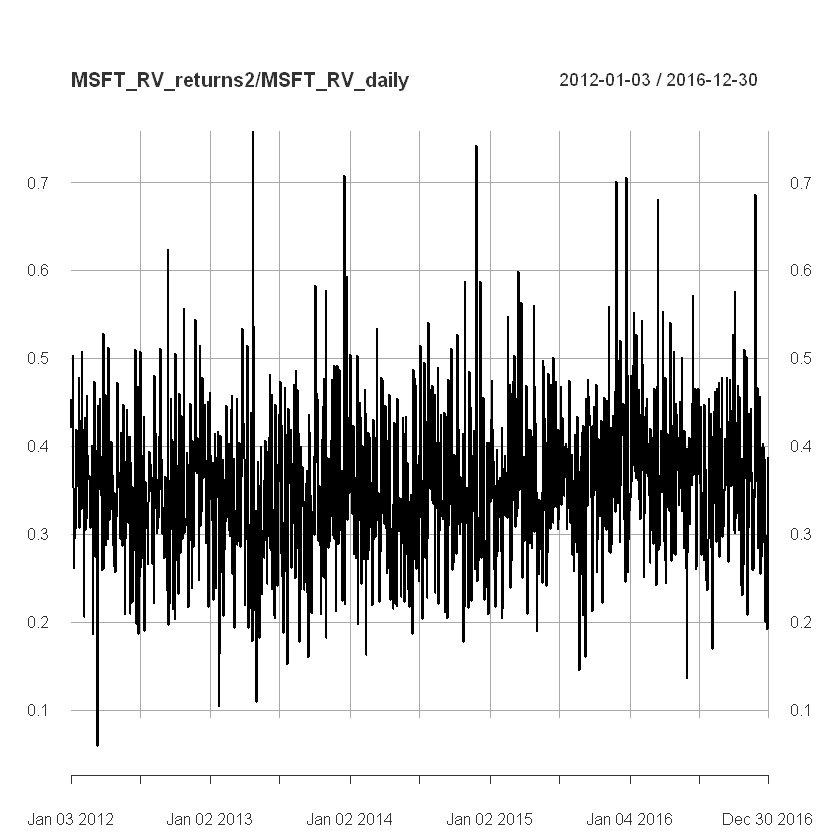

[1] 0.4435006

[1] 0.3513408

[1] 0.2051586

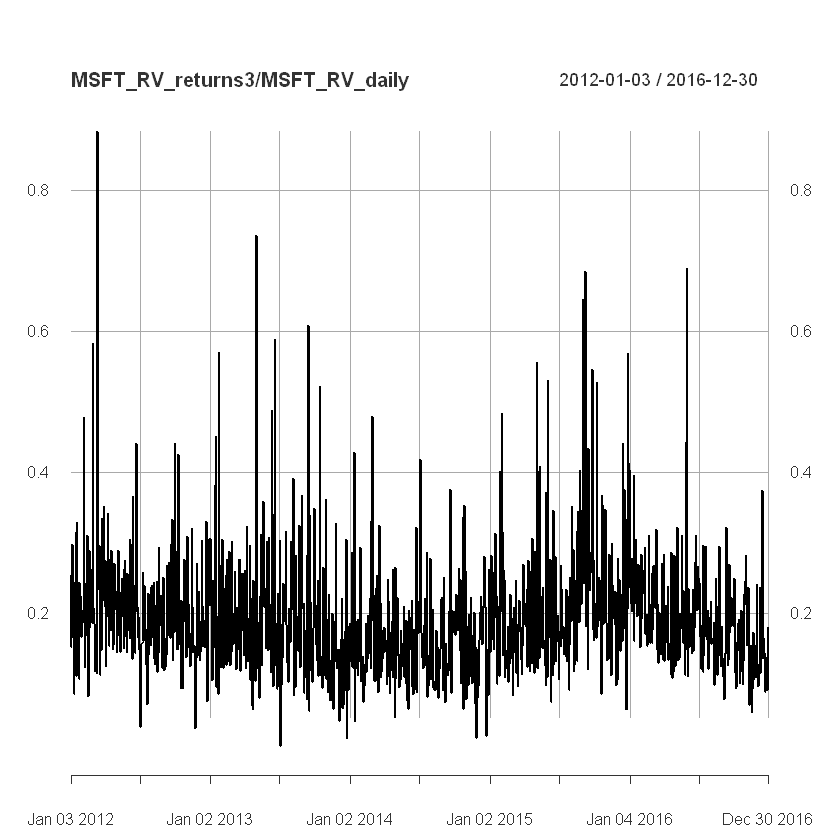

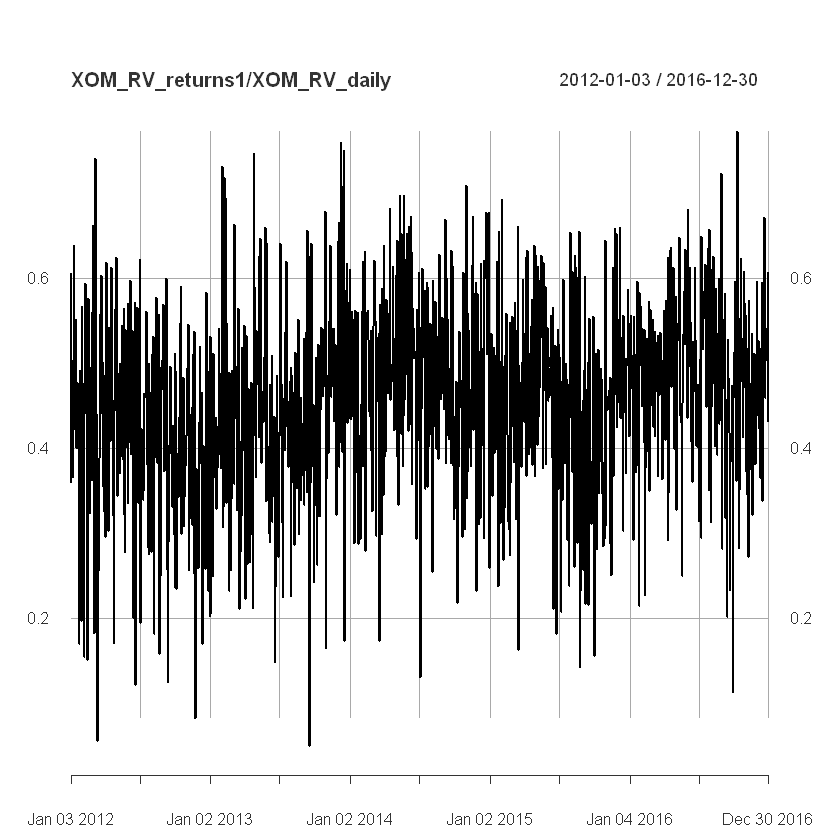

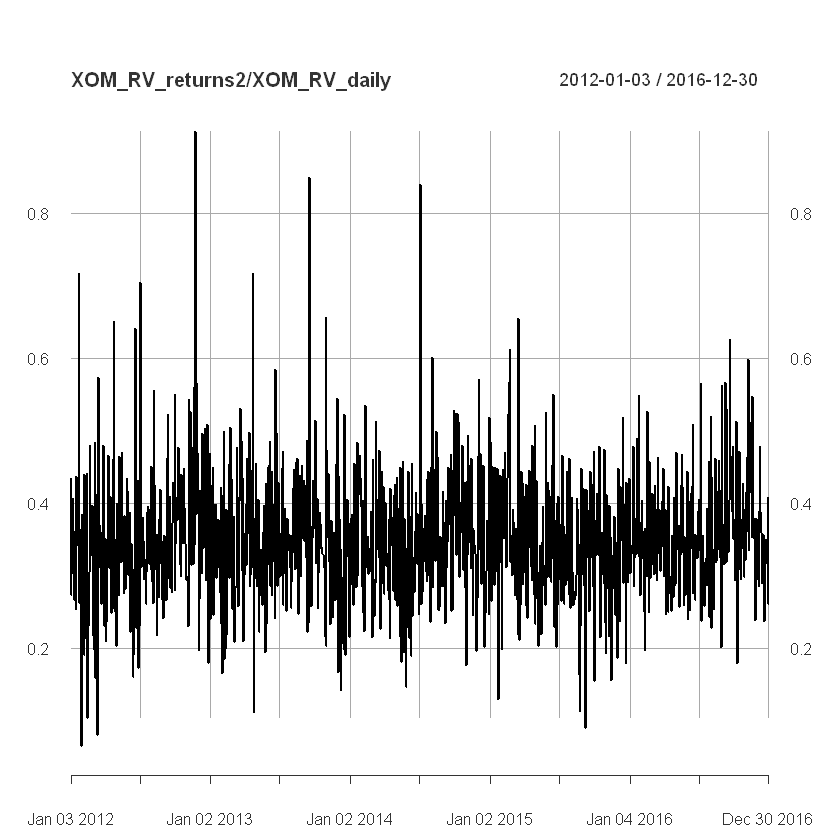

[1] 0.4449914

[1] 0.3463525

[1] 0.2086561

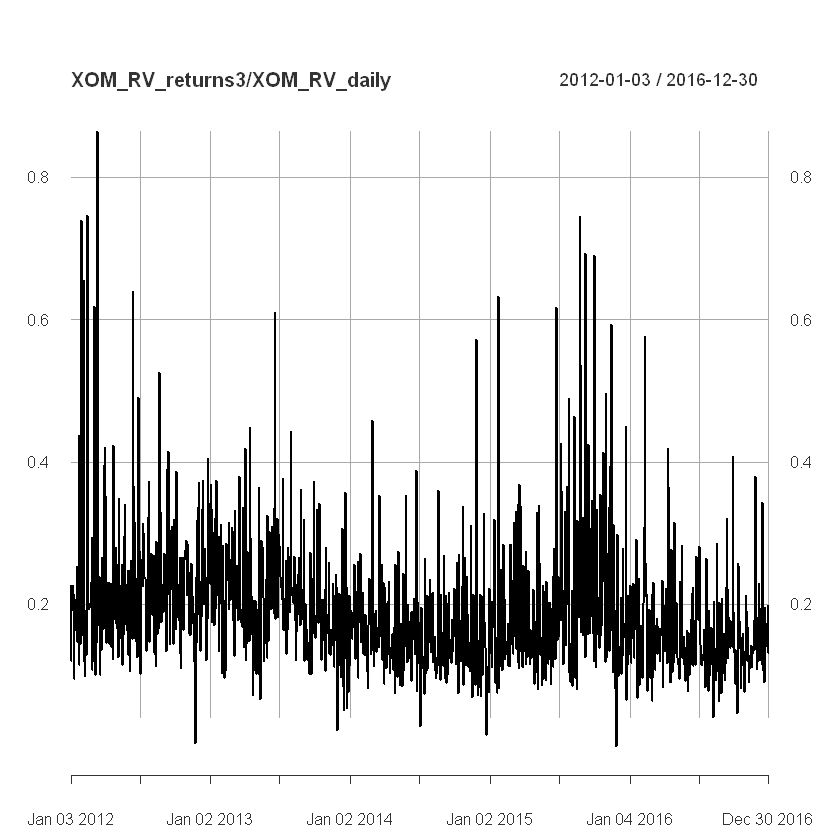

In [9]:
# Calculate and plot proportion of RV from intraday periods and daily RV for each stock
# BAC
plot(BAC_RV_returns1/BAC_RV_daily)
plot(BAC_RV_returns2/BAC_RV_daily)
plot(BAC_RV_returns3/BAC_RV_daily)

sum(BAC_RV_returns1)/sum(BAC_RV_daily)
sum(BAC_RV_returns2)/sum(BAC_RV_daily)
sum(BAC_RV_returns3)/sum(BAC_RV_daily)

# MSFT
plot(MSFT_RV_returns1/MSFT_RV_daily)
plot(MSFT_RV_returns2/MSFT_RV_daily)
plot(MSFT_RV_returns3/MSFT_RV_daily)

sum(MSFT_RV_returns1)/sum(MSFT_RV_daily)
sum(MSFT_RV_returns2)/sum(MSFT_RV_daily)
sum(MSFT_RV_returns3)/sum(MSFT_RV_daily)

# XOM
plot(XOM_RV_returns1/XOM_RV_daily)
plot(XOM_RV_returns2/XOM_RV_daily)
plot(XOM_RV_returns3/XOM_RV_daily)

sum(XOM_RV_returns1)/sum(XOM_RV_daily)
sum(XOM_RV_returns2)/sum(XOM_RV_daily)
sum(XOM_RV_returns3)/sum(XOM_RV_daily)

From all stocks, we can see, that the share of the RV for each intraday period is different and it is the highest for first period and the lowest for the third one.
So, we know that trading hours have significant impact on RV. RV is the highest after opening and then gradually falls, but we cannot confirm that beacause our intervals are to long. For example, lunch time may have an impact. 

### 8)

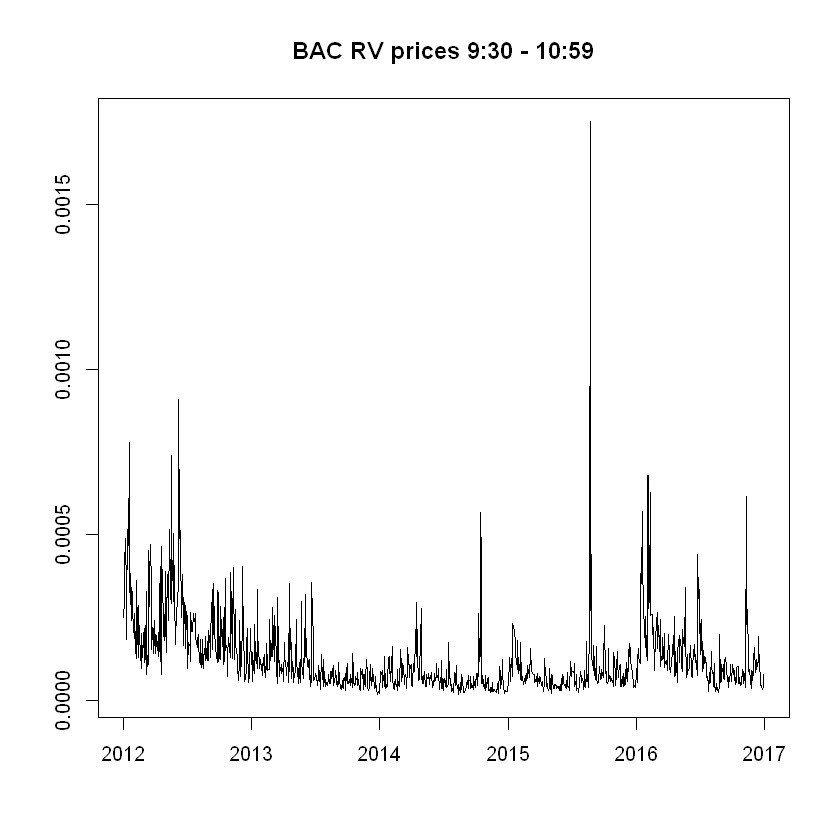

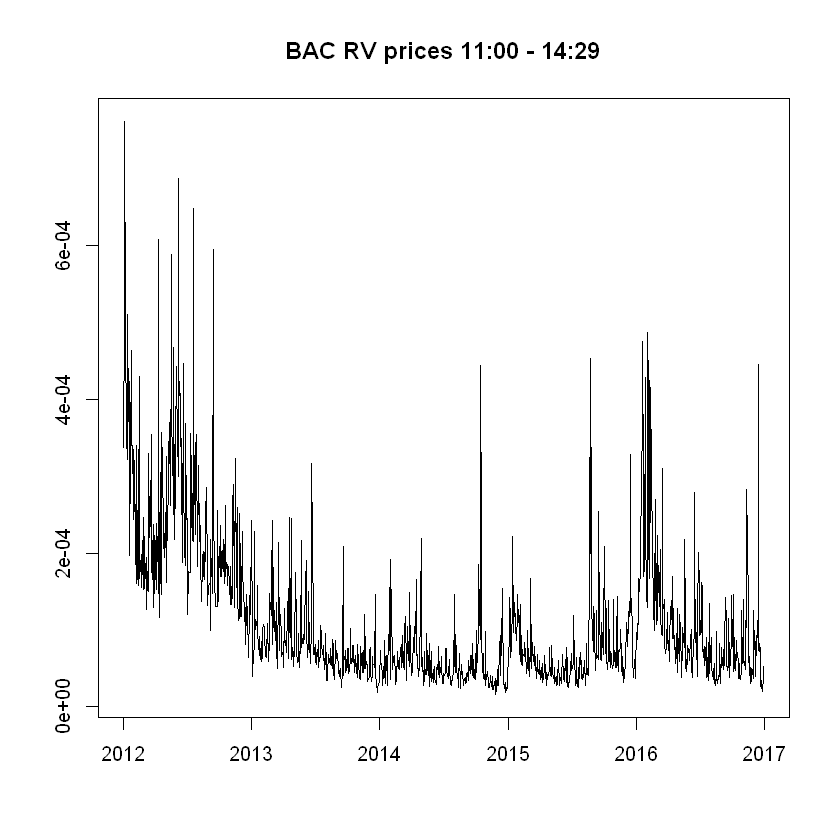

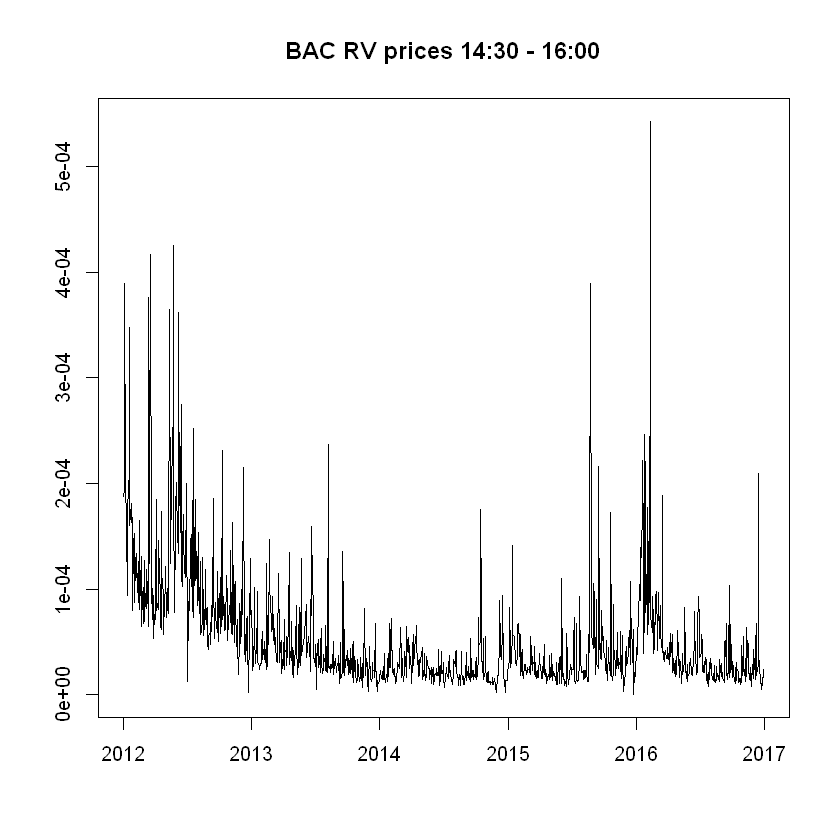

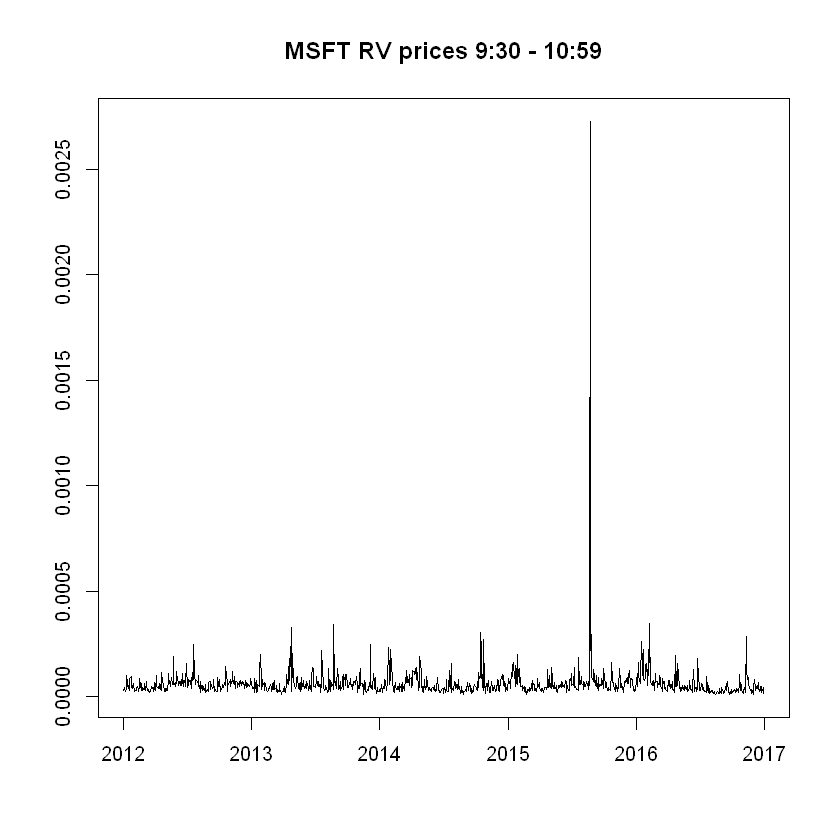

ERROR: Error in x[(2:l), ]: subscript out of bounds


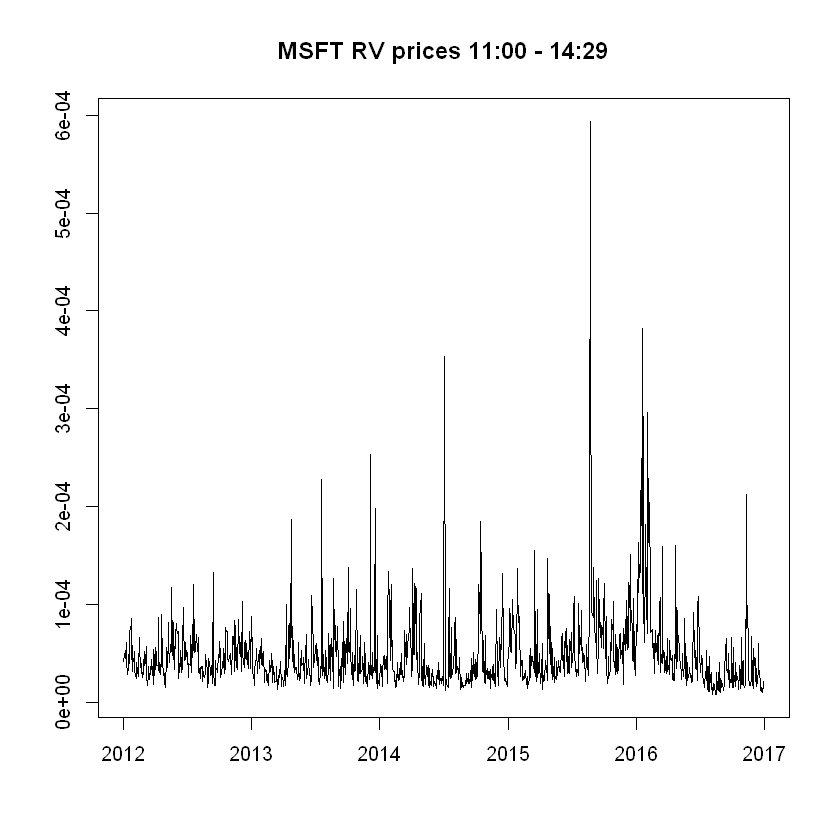

In [10]:
# Repeat part 5-7 using prices instead of returns
# Mostly we apply rCov function with argument makeReturns = TRUE on prices, instead of calculating returns setting argument makeReturns = FALSE

# 8.5
# Calculate intraday RV
# BAC
BAC1 <- BAC_xts["T09:30:00/T10:59:00" ]
index(BAC1)<-as.Date(index(BAC1))
BAC1_RV_prices <- rCov(BAC1, makeReturns = T)
plot.zoo(BAC1_RV_prices, xlab = NA,ylab = NA, main = "BAC RV prices 9:30 - 10:59")

BAC2 <- BAC_xts["T11:00:00/T14:29:00" ]
index(BAC2)<-as.Date(index(BAC2))
BAC2_RV_prices <- rCov(BAC2, makeReturns = T)
plot.zoo(BAC2_RV_prices, xlab = NA,ylab = NA, main = "BAC RV prices 11:00 - 14:29")

BAC3 <- BAC_xts["T14:30:00/T16:00:00" ]
index(BAC3)<-as.Date(index(BAC3))
BAC3_RV_prices <- rCov(BAC3, makeReturns = T)
plot.zoo(BAC3_RV_prices, xlab = NA,ylab = NA, main = "BAC RV prices 14:30 - 16:00")

# MSFT
MSFT1 <- MSFT_xts["T09:30:00/T10:59:00" ]
index(MSFT1)<-as.Date(index(MSFT1))
MSFT1_RV_prices <- rCov(MSFT1, makeReturns = T)
plot.zoo(MSFT1_RV_prices, xlab = NA,ylab = NA, main = "MSFT RV prices 9:30 - 10:59")

MSFT2 <- MSFT_xts["T11:00:00/T14:29:00" ]
index(MSFT2)<-as.Date(index(MSFT2))
MSFT2_RV_prices <- rCov(MSFT2, makeReturns = T)
plot.zoo(MSFT2_RV_prices, xlab = NA,ylab = NA, main = "MSFT RV prices 11:00 - 14:29")

MSFT3 <- MSFT_xts["T14:30:00/T16:00:00" ]
index(MSFT3)<-as.Date(index(MSFT3))
MSFT3_RV_prices <- rCov(MSFT3, makeReturns = T)
plot.zoo(MSFT3_RV_prices, xlab = NA,ylab = NA, main = "MSFT RV prices 14:30 - 16:00")

# XOM
XOM1 <- XOM_xts["T09:30:00/T10:59:00" ]
index(XOM1)<-as.Date(index(XOM1))
XOM1_RV_prices <- rCov(XOM1, makeReturns = T)
plot.zoo(XOM1_RV_prices, xlab = NA,ylab = NA, main = "XOM RV prices 9:30 - 10:59")

XOM2 <- XOM_xts["T11:00:00/T14:29:00" ]
index(XOM2)<-as.Date(index(XOM2))
XOM2_RV_prices <- rCov(XOM2, makeReturns = T)
plot.zoo(XOM2_RV_prices, xlab = NA,ylab = NA, main = "XOM RV prices 11:00 - 14:29")

XOM3 <- XOM_xts["T14:30:00/T16:00:00" ]
index(XOM3)<-as.Date(index(XOM3))
XOM3_RV_prices <- rCov(XOM3, makeReturns = T)
plot.zoo(XOM3_RV_prices, xlab = NA,ylab = NA, main = "XOM RV prices 14:30 - 16:00")

# 8.6
# Plot the difference between sum of intraday RV and daily RV
BAC_RV_intraday_prices <- BAC1_RV_prices + BAC2_RV_prices + BAC3_RV_prices
BAC_RV_diff_prices <-   BAC_RV_prices - BAC_RV_intraday_prices
plot.zoo(BAC_RV_diff_prices)

MSFT_RV_intraday_prices <- MSFT1_RV_prices + MSFT2_RV_prices + MSFT3_RV_prices
MSFT_RV_diff_prices <-   MSFT_RV_prices - MSFT_RV_intraday_prices
plot.zoo(MSFT_RV_diff_prices)

XOM_RV_intraday_prices <- XOM1_RV_prices + XOM2_RV_prices + XOM3_RV_prices
XOM_RV_diff_prices <-   XOM_RV_prices - XOM_RV_intraday_prices
plot.zoo(XOM_RV_diff_prices)

# 8.7
# PLot and calculate proportion of intraday RV in daily R.Version
# BAC
plot(BAC1_RV_prices/BAC_RV_prices)
plot(BAC2_RV_prices/BAC_RV_prices)
plot(BAC3_RV_prices/BAC_RV_prices)

sum(BAC1_RV_prices)/sum(BAC_RV_prices)
sum(BAC2_RV_prices)/sum(BAC_RV_prices)
sum(BAC3_RV_prices)/sum(BAC_RV_prices)

#MSFT
plot(MSFT1_RV_prices/MSFT_RV_prices)
plot(MSFT2_RV_prices/MSFT_RV_prices)
plot(MSFT3_RV_prices/MSFT_RV_prices)

sum(MSFT1_RV_prices)/sum(MSFT_RV_prices)
sum(MSFT2_RV_prices)/sum(MSFT_RV_prices)
sum(MSFT3_RV_prices)/sum(MSFT_RV_prices)

#XOM
plot(XOM1_RV_prices/XOM_RV_prices)
plot(XOM2_RV_prices/XOM_RV_prices)
plot(XOM3_RV_prices/XOM_RV_prices)

sum(XOM1_RV_prices)/sum(XOM_RV_prices)
sum(XOM2_RV_prices)/sum(XOM_RV_prices)
sum(XOM3_RV_prices)/sum(XOM_RV_prices)

While the difference calculated using returns is both positive and negative and very small, the difference calculated from prices has much higher magnitude.
Again it is higher when RV is higher.

### 9)

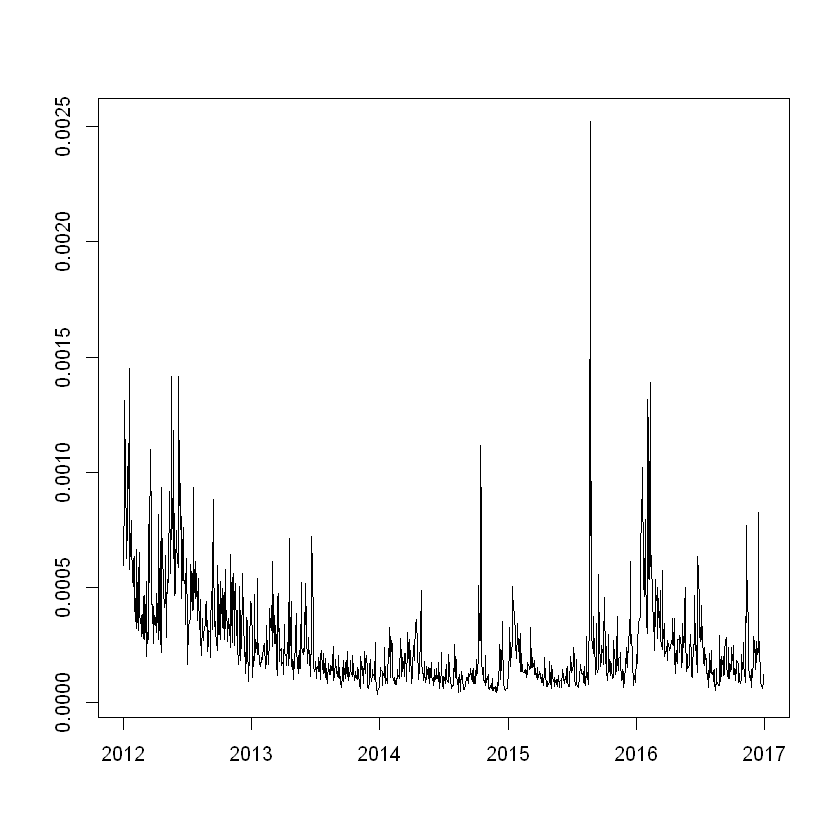

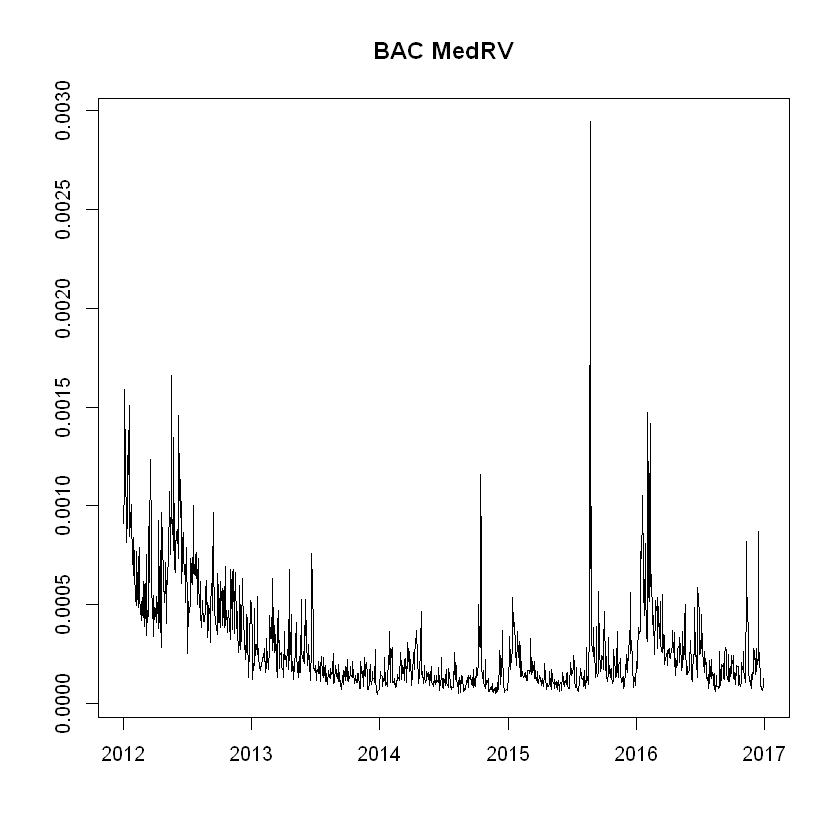

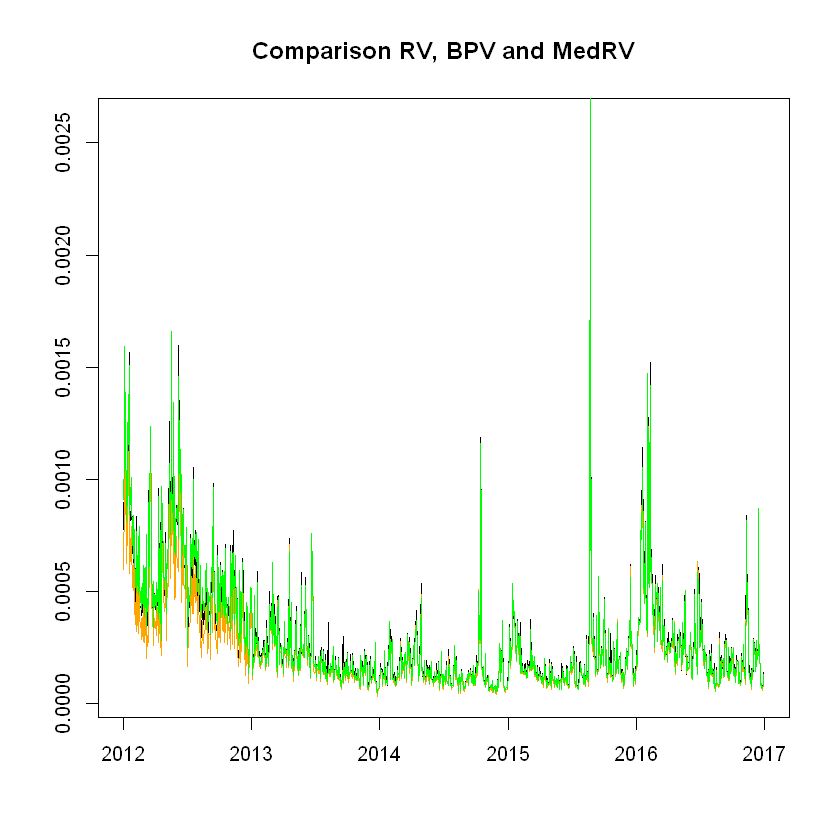

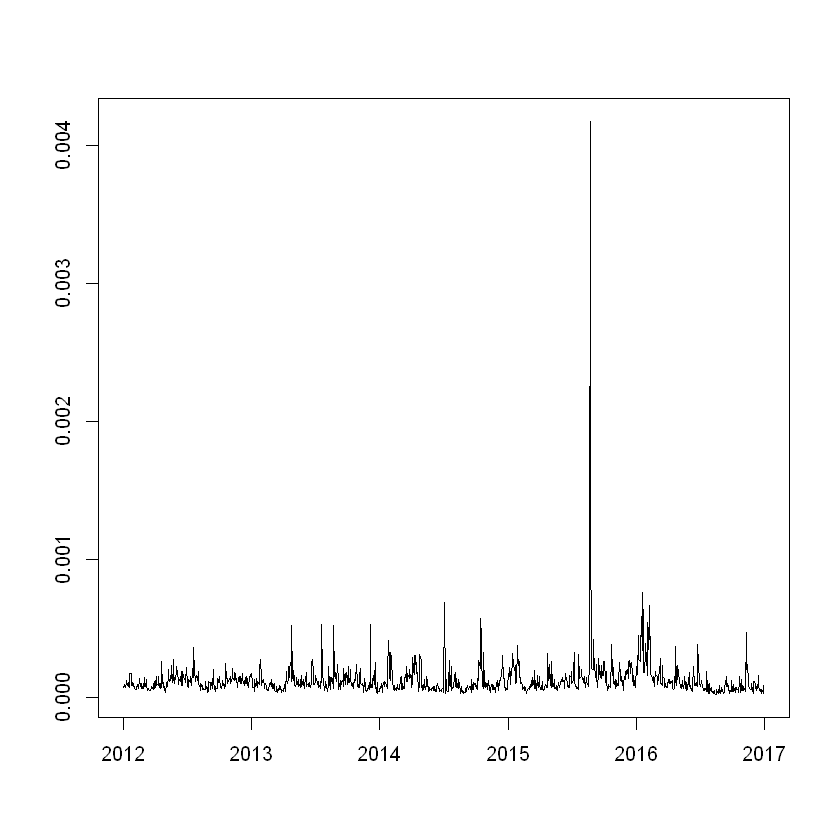

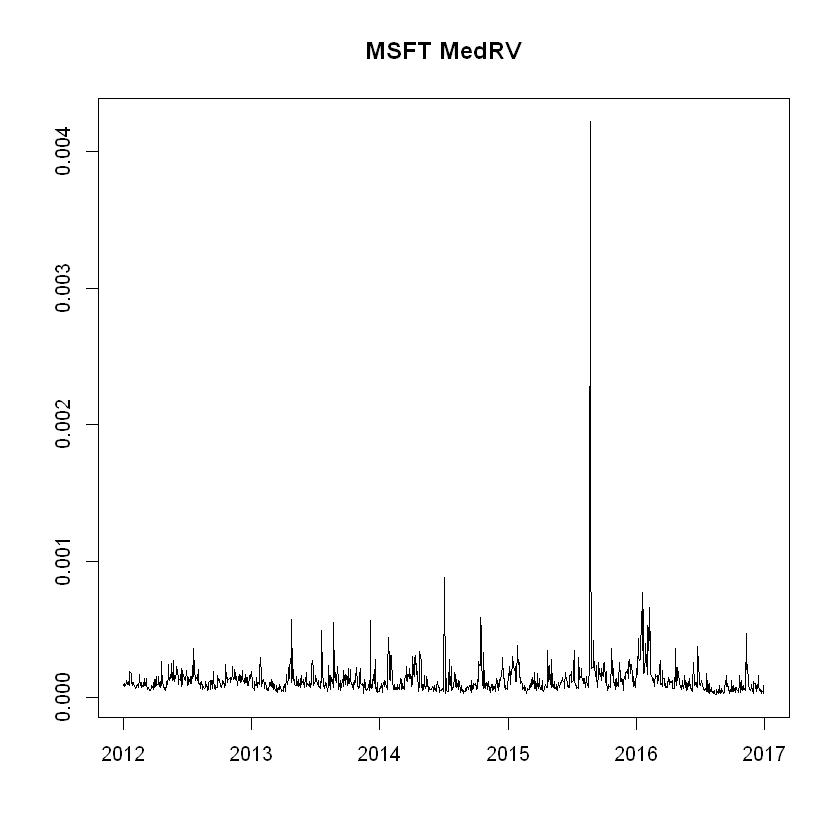

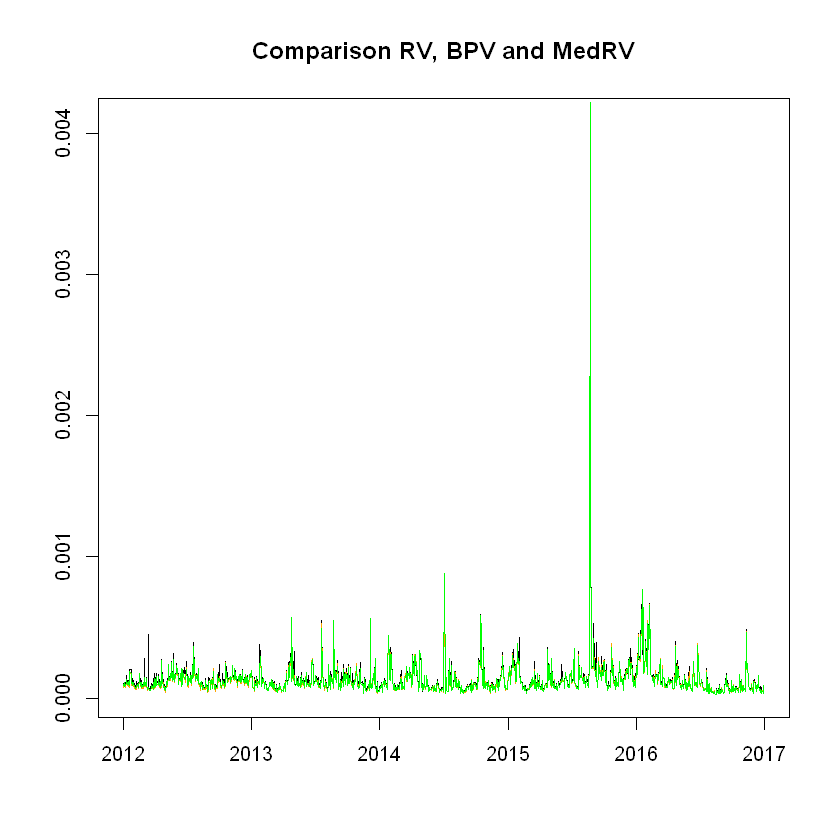

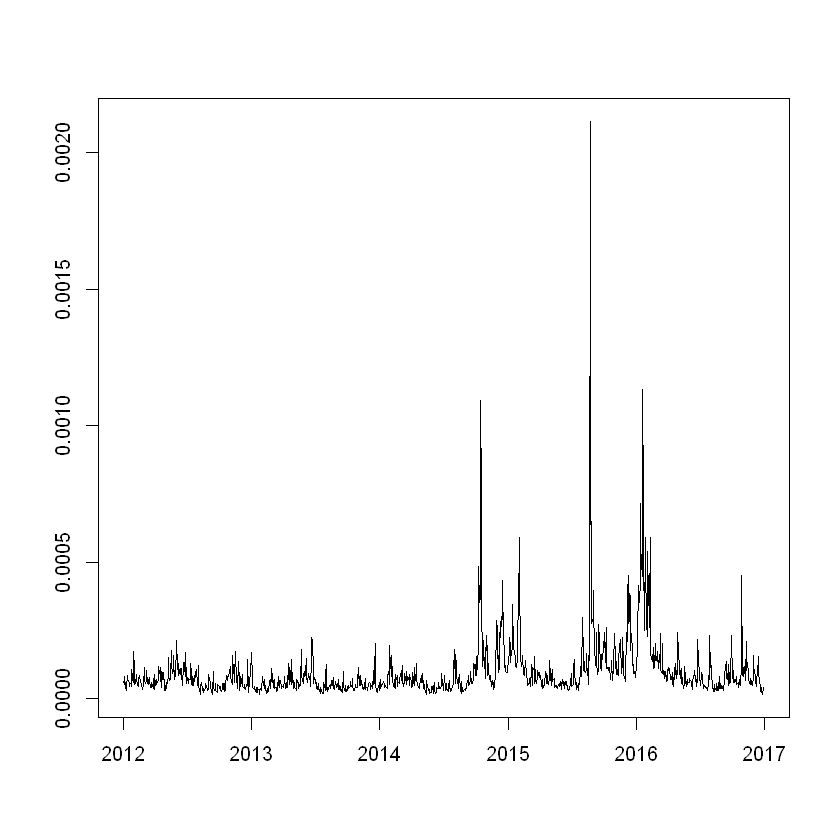

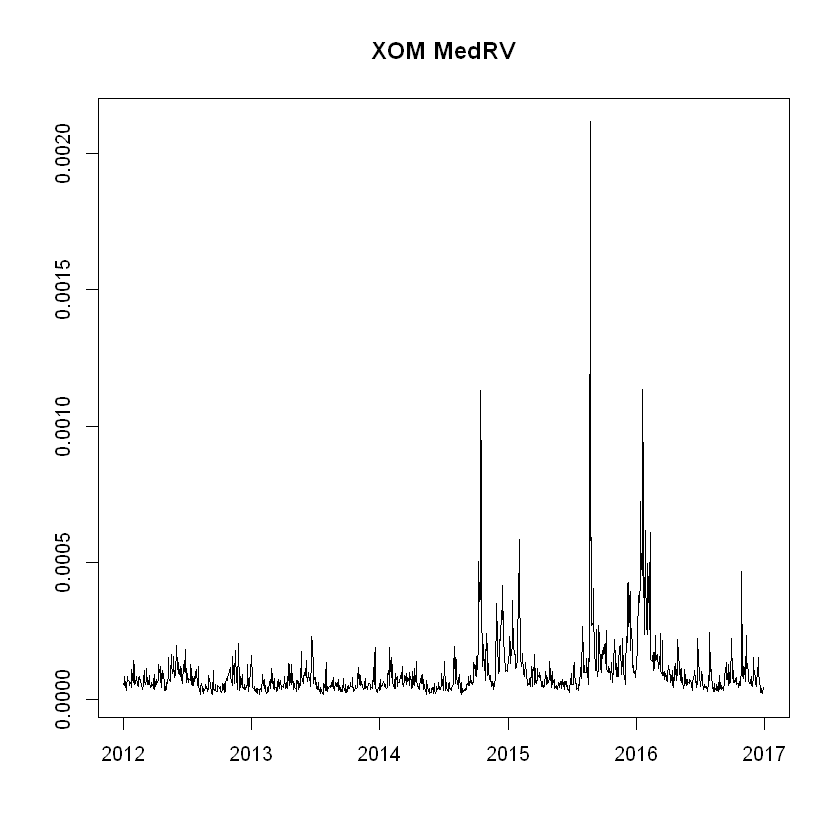

Warning message:
"object timezone (UTC) is different from system timezone ()
  NOTE: set 'options(xts_check_TZ = FALSE)'to disable this warning
    This note is displayed once per session"


                       ztest     lower    upper      p.value
2012-01-03 16:00:00 6.424369 -1.959964 1.959964 1.324172e-10
2012-01-04 16:00:00 1.814386 -1.959964 1.959964 6.961827e-02
2012-01-05 16:00:00 4.184533 -1.959964 1.959964 2.857527e-05
2012-01-06 16:00:00 4.059917 -1.959964 1.959964 4.909007e-05
2012-01-09 16:00:00 3.738418 -1.959964 1.959964 1.851816e-04
2012-01-10 16:00:00 3.668771 -1.959964 1.959964 2.437191e-04
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

Warning message:
"object timezone (UTC) is different from system timezone ()"


                       ztest     lower    upper      p.value
2012-01-03 16:00:00 6.855655 -1.959964 1.959964 7.098654e-12
2012-01-04 16:00:00 2.281651 -1.959964 1.959964 2.250995e-02
2012-01-05 16:00:00 7.751206 -1.959964 1.959964 9.102388e-15
2012-01-06 16:00:00 5.524549 -1.959964 1.959964 3.303334e-08
2012-01-09 16:00:00 2.400956 -1.959964 1.959964 1.635229e-02
2012-01-10 16:00:00 2.597942 -1.959964 1.959964 9.378429e-03
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

Warning message:
"object timezone (UTC) is different from system timezone ()"


                        ztest     lower    upper      p.value
2012-01-03 16:00:00 0.5563091 -1.959964 1.959964 5.779996e-01
2012-01-04 16:00:00 5.7929288 -1.959964 1.959964 6.916943e-09
2012-01-05 16:00:00 1.0568992 -1.959964 1.959964 2.905576e-01
2012-01-06 16:00:00 1.7064755 -1.959964 1.959964 8.791959e-02
2012-01-09 16:00:00 6.4570382 -1.959964 1.959964 1.067720e-10
2012-01-10 16:00:00 5.3429098 -1.959964 1.959964 9.146630e-08
                    universalThresholdLower universalThresholdUpper
2012-01-03 16:00:00               -2.566441                2.566441
2012-01-04 16:00:00               -2.566441                2.566441
2012-01-05 16:00:00               -2.566441                2.566441
2012-01-06 16:00:00               -2.566441                2.566441
2012-01-09 16:00:00               -2.566441                2.566441
2012-01-10 16:00:00               -2.566441                2.566441

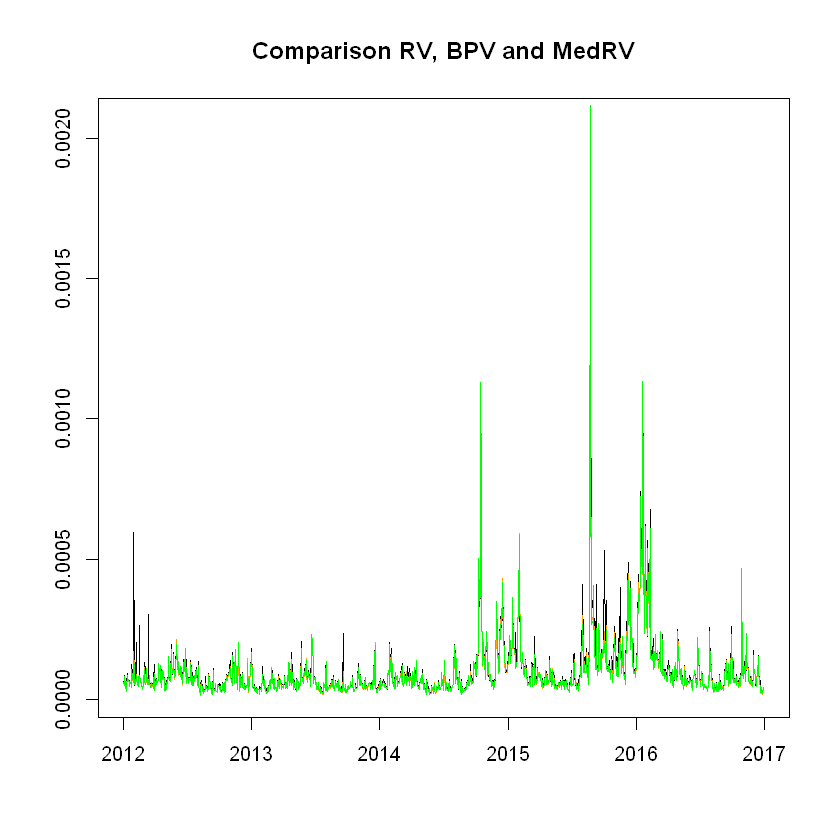

In [11]:
# Calculate Bipower variation and Median Realized Variation. Then test for jumps in each period
# Compare graphically realized variation, bipower variation and MedRV

#BAC
# BIPOWER VARIATION
BAC_BPV<-rBPCov(BAC_no_time, makeReturns = T)

plot.zoo(BAC_BPV,xlab=NA,ylab=NA)
BAC_BP_jumps<- BNSjumpTest(BAC_xts,IVestimator = "BV",IQestimator = "TP", makeReturns = T)
# MedRV estimator
BAC_MedRV<-rMedRVar(BAC_no_time, makeReturns = T)
plot.zoo(BAC_MedRV, xlab=NA, ylab=NA,main="BAC MedRV")
BAC_MedRV_jumps<- BNSjumpTest(BAC_xts,IVestimator = "rMedRVar",IQestimator = "TP", makeReturns = T)

plot.zoo(BAC_RV_returns, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(zoo(BAC_BPV),col="orange")
lines(zoo(BAC_MedRV),col="green")

# MSFT
# BIPOWER VARIATION
MSFT_BPV<-rBPCov(MSFT_no_time, makeReturns = T)
plot.zoo(MSFT_BPV,xlab=NA,ylab=NA)
MSFT_BP_jumps<- BNSjumpTest(MSFT_xts,IVestimator = "BV",IQestimator = "TP", makeReturns = T)
# MedRV estimator
MSFT_MedRV<-rMedRVar(MSFT_no_time, makeReturns = T)
plot.zoo(MSFT_MedRV, xlab=NA, ylab=NA,main="MSFT MedRV")
MSFT_MedRV_jumps<- BNSjumpTest(MSFT_xts,IVestimator = "rMedRVar",IQestimator = "TP", makeReturns = T)

plot.zoo(MSFT_RV_returns, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(zoo(MSFT_BPV),col="orange")
lines(zoo(MSFT_MedRV),col="green")

# XOM
# BIPOWER VARIATION
XOM_BPV<-rBPCov(XOM_no_time, makeReturns = T)
plot.zoo(XOM_BPV,xlab=NA,ylab=NA)
XOM_BP_jumps<- BNSjumpTest(XOM_xts,IVestimator = "BV",IQestimator = "TP", makeReturns = T)
# MedRV estimator
XOM_MedRV<-rMedRVar(XOM_no_time, makeReturns = T)
plot.zoo(XOM_MedRV, xlab=NA, ylab=NA,main="XOM MedRV")
XOM_MedRV_jumps<- BNSjumpTest(XOM_xts,IVestimator = "rMedRVar",IQestimator = "TP", makeReturns = T)

plot.zoo(XOM_RV_returns, xlab=NA, ylab=NA,main="Comparison RV, BPV and MedRV")
lines(zoo(XOM_BPV),col="orange")
lines(zoo(XOM_MedRV),col="green")

# Jumps
head(BAC_BP_jumps)
head(MSFT_BP_jumps)
head(XOM_BP_jumps)
